## EDA
EDA stands for Exploratory Data Analysis. It is an approach to analyzing datasets to summarize their main characteristics, often with visual methods. EDA is used to understand the data, get a context of the data, check assumptions, and determine the appropriate statistical tool to use. It involves creating visualizations to help understand trends, patterns, and relationships within the data. It's a crucial step before any formal, detailed data analysis and helps data scientists get a sense of what the data can tell them.

TODO: Conduct basic analysis on the rating and prof dataset. Come up with a few questions you would like to address. 

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

########### Import more libraries if needed

In [3]:
RATING_PATH = "../data/clean_ratings.csv"
PROF_PATH = "../data/clean_prof_info.csv"

rating = pd.read_csv(RATING_PATH)
prof = pd.read_csv(PROF_PATH)

In [4]:
print(rating.columns)
print("----------------------------------")
print(prof.columns)

Index(['profID', 'attendanceMandatory', 'class', 'comment', 'date',
       'difficultyRating', 'grade', 'helpfulRating', 'isForCredit',
       'isForOnlineClass', 'ratingTags', 'wouldTakeAgain'],
      dtype='object')
----------------------------------
Index(['profID', 'avgDifficulty', 'avgRating', 'department', 'firstName',
       'lastName', 'numRatings', 'wouldTakeAgainPercent', 'fullName'],
      dtype='object')


In [5]:
rating.head()

,profID,attendanceMandatory,class,comment,date,difficultyRating,grade,helpfulRating,isForCredit,isForOnlineClass,ratingTags,wouldTakeAgain
0,7964,False,ANTHRCUL101,Fricke is the man. Entire class probably took ...,2019-04-28 17:13:12,1.0,A,5.0,False,False,"['Respected', 'Inspirational', 'Amazing Lectur...",True
1,7964,False,ANTHRO101,Tom Fricke is one of those professors you will...,2019-01-08 18:41:24,1.0,A+,5.0,False,False,"['Accessible Outside Class', 'Hilarious', 'Ama...",True
2,7964,False,ANTHRCUL101,Prof. Fricke is amazing. He is hilarious and t...,2018-12-16 03:11:18,1.0,A,5.0,False,False,"['Hilarious', 'Graded By Few Things', 'Caring']",True
3,7964,False,CULTANTHRO101,Such an easy class. Exams were exactly like th...,2018-12-12 10:03:19,1.0,A,5.0,False,False,"['Accessible Outside Class', 'Graded By Few Th...",True
4,7964,False,ANTHRCUL101,Easiest class i have taken at UM. The exams to...,2018-12-11 16:33:00,1.0,A+,5.0,False,False,"['Respected', 'Hilarious', 'Amazing Lectures']",True


In [6]:
prof.head()

,profID,avgDifficulty,avgRating,department,firstName,lastName,numRatings,wouldTakeAgainPercent,fullName
0,7775,2.3,4.4,Mechanical Engineering,Alan,Wineman,34,80.0,Alan Wineman
1,7964,1.6,4.5,Anthropology,Thomas,Fricke,114,95.0,Thomas Fricke
2,8045,2.6,3.2,Biology,Julian,Adams,22,NaN,Julian Adams
3,8189,3.1,4.6,Music,Deborah,Chodacki,8,NaN,Deborah Chodacki
4,10260,4.0,2.3,Political Science,Arlene,Saxonhouse,86,66.0,Arlene Saxonhouse


In [16]:
eecs376 = rating[rating["class"]== "EECS376"]
#eecs376["comment"].tolist()
eecs376.wouldTakeAgain.value_counts()



False    64
True     54
Name: wouldTakeAgain, dtype: int64

/var/folders/qf/zb461w1x2pn3k9lkmtq41d2m0000gn/T/ipykernel_24588/2000210623.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  courses = rating.groupby("class")["wouldTakeAgain", "difficultyRating"].mean()


Text(0, 0.5, 'Would Take Again Percentage')

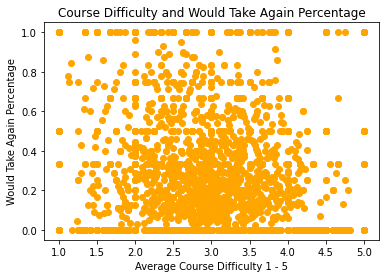

In [31]:
courses = rating.groupby("class")["wouldTakeAgain", "difficultyRating"].mean()
plt.scatter(x=courses["difficultyRating"], y=courses["wouldTakeAgain"], color="orange")
plt.title("Course Difficulty and Would Take Again Percentage")
plt.xlabel("Average Course Difficulty 1 - 5")
plt.ylabel("Would Take Again Percentage")